## Finding Heavy Traffic Indicators on I-94
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).

**The goal** : is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [63]:

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [65]:
df.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [66]:
df.tail(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


 Analyzing Traffic Volume
 The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).
 This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should **avoid** generalizing our results for the entire I-94 highway.

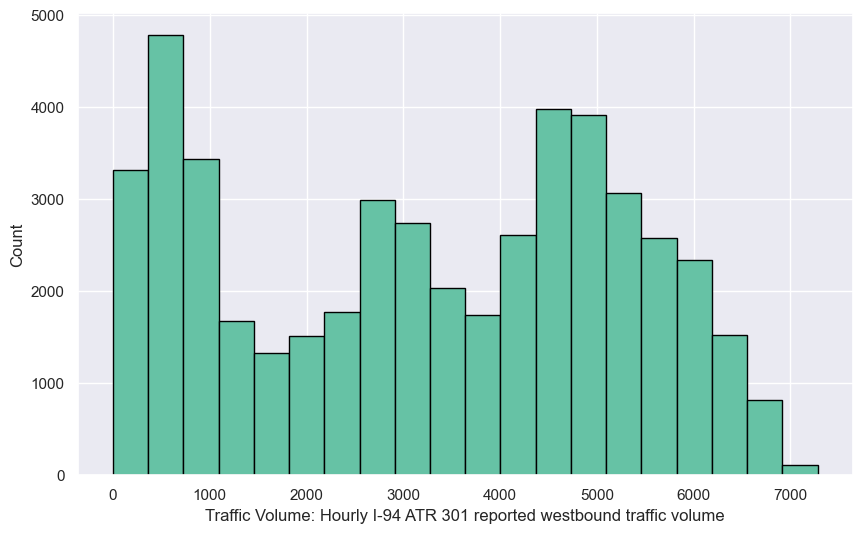

In [67]:
#Plotting a distribution of the traffic volume. 
plt.figure(figsize=(10,6))
plt.hist(df['traffic_volume'], bins=20, edgecolor="black")
plt.xlabel('Traffic Volume: Hourly I-94 ATR 301 reported westbound traffic volume')
plt.ylabel('Count')
plt.show()

In [68]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The dataset time frame is between `2012-10-02 09:00:00` and `2018-09-30 23:00:00`, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

Approximately a quarter of the time (25%), the station observed traffic volumes of 1,193 cars or fewer per hour, likely happening during nighttime hours or road construction periods. Conversely, another quarter of the time (75%), traffic volume surged to at least four times that amount, with 4,933 cars or more passing through.

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

In [69]:
# Transform the date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

#Getting the hours of every instance
df['hour'] = df['date_time'].dt.hour
# df['hour'].unique()


We will divide the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [70]:
# Function to isolate day and night. 
# Create a copy of the original dataset.
df_copy = df.copy()

def day_night(hour):
    if 7 <= hour < 19:
        return 'Day'
    else:
        return 'Night'
    
# Create new "Day or Night" column  
df_copy['Day or Night'] = df_copy['hour'].apply(day_night)

daytime_data = df_copy[df_copy['Day or Night'] == 'Day']
night_data = df_copy[df_copy['Day or Night'] == 'Night']

df_copy.sample(3)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,Day or Night
5765,NaN,274.82,0.0,0.0,90,Rain,light rain,2013-05-04 20:00:00,3228,20,Night
36604,NaN,291.29,0.0,0.0,90,Drizzle,light intensity drizzle,2017-08-25 22:00:00,2863,22,Night
44028,NaN,289.23,0.0,0.0,1,Rain,moderate rain,2018-05-12 15:00:00,4283,15,Day


In [71]:
daytime_data['Day or Night'].value_counts()

Day or Night
Day    23877
Name: count, dtype: int64

In [72]:
night_data['Day or Night'].value_counts()

Day or Night
Night    24327
Name: count, dtype: int64

Plotting day and night time traffic volumes:

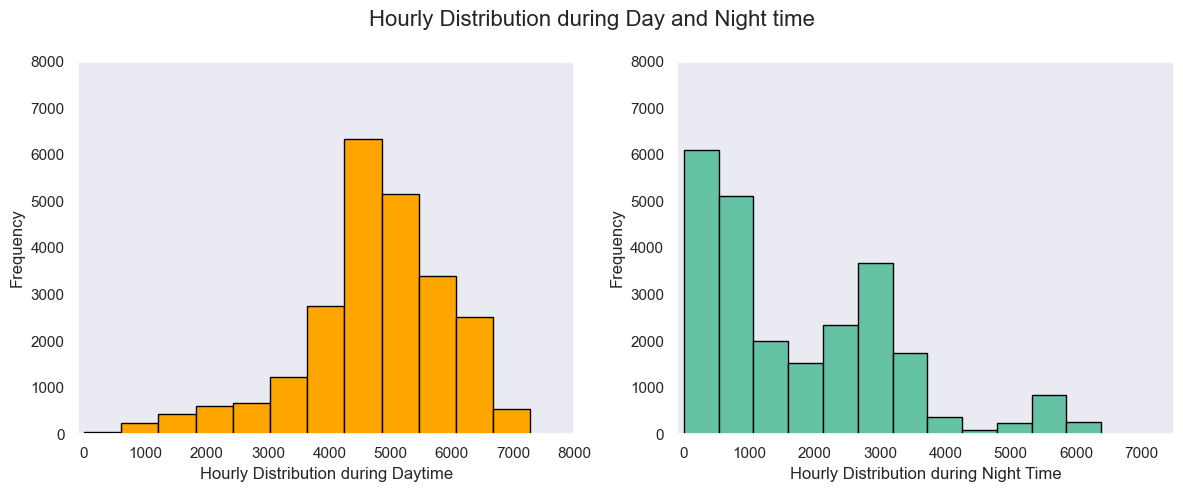

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].hist(daytime_data['traffic_volume'], bins=12, edgecolor="black", color='orange')
axes[0].set_xlabel('Hourly Distribution during Daytime')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(-100, 8000)
axes[0].set_ylim(0,8000)
axes[0].grid()

axes[1].hist(night_data['traffic_volume'], bins=12, edgecolor="black")
axes[1].set_xlabel('Hourly Distribution during Night Time')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(-100, 7500)
axes[1].set_ylim(0, 8000)
axes[1].grid()

fig.suptitle('Hourly Distribution during Day and Night time', fontsize=16)
plt.tight_layout()

plt.show()

In [74]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [75]:
night_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram depicting daytime traffic volume distribution exhibits a left skew, indicating that a significant portion of the data features high traffic volumes. Specifically, 75% of the time, the number of cars passing the station each hour exceeds 5,559, as evidenced by the distribution.

Conversely, the histogram representing nighttime traffic data displays a right skew, suggesting that the majority of traffic volume values are low. Approximately 75% of the time, the hourly car count at the station falls below 2,819.

Despite occasional measurements exceeding 5,000 cars per hour, nighttime traffic is generally characterized by light volumes. As our objective is to identify heavy traffic indicators, *we will focus exclusively on daytime data going forward*.


If the histogram of traffic volume during the daytime is skewed to the left, it may indicate that there is higher traffic volume during the earlier hours of the day compared to the later hours. Here are a few interpretations based on this observation:

- Morning Rush Hour: The left-skewed distribution may suggest that there is a higher volume of traffic during the morning rush hour as people commute to work or school. This could mean that there are more vehicles on the road during this time, leading to congestion and slower traffic speeds.






## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

### Time Indicators: Month

In [76]:
# daytime_data.info()

In [77]:
#  Operation already been  performed on the copy of the original dataset, so the following statement is  to disregard a warning message:
# "A value is trying to be set on a copy of a slice from a data frame.
# Try using .loc[row_indexer,col_indexer] = value instead ""

pd.options.mode.chained_assignment = None

daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean(numeric_only=True)
by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Next step is to visualize the traffic volume by month:

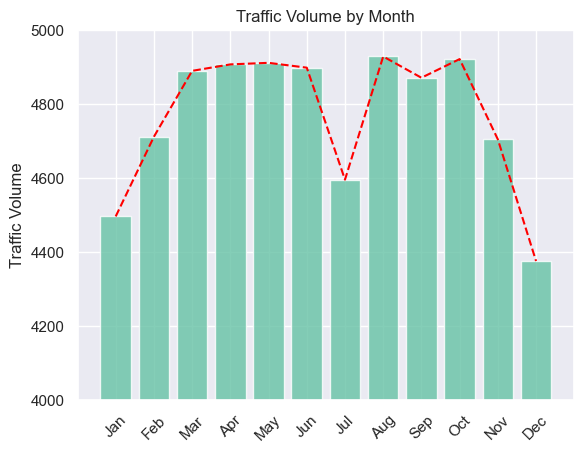

In [78]:
#Adding months` names` for better readability
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.bar(month_names, by_month['traffic_volume'], alpha=0.8)
plt.plot(month_names, by_month['traffic_volume'], 'r--')
plt.xticks(rotation=45)  
plt.ylabel('Traffic Volume')
plt.ylim(4000,5000)
plt.title('Traffic Volume by Month')
plt.show()

The traffic increases during the summer time; however, an abrupt decrease in traffic is observed specifically in July. This anomaly needs further investigation to uncover the underlying reason behind this sudden drop in July's traffic volume.

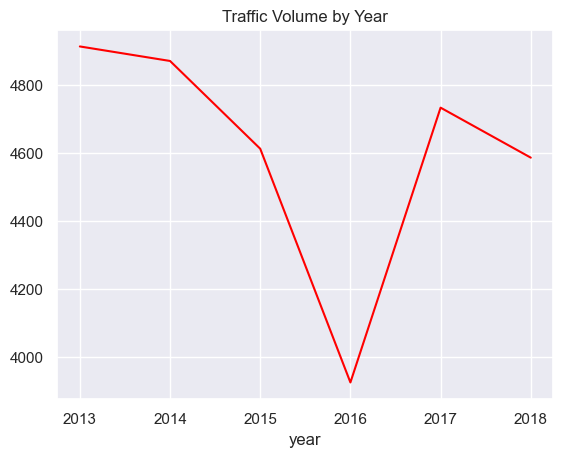

In [79]:
daytime_data['year'] = daytime_data['date_time'].dt.year
only_july = daytime_data[daytime_data['month'] == 7]
only_july.groupby('year').mean(numeric_only=True)['traffic_volume'].plot.line(color='Red')
plt.title('Traffic Volume by Year')
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — this article from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.


### Time Indicators: Day of the Week
We'll now continue with building line plots for another time unit: day of the week.

In [80]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean(numeric_only=True)
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

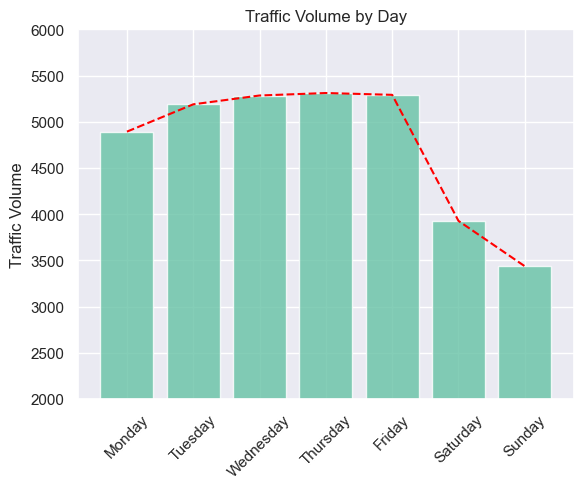

In [81]:
week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.bar(week_names, by_dayofweek['traffic_volume'], alpha=0.8)
plt.plot(week_names, by_dayofweek['traffic_volume'], 'r--')
plt.xticks(rotation=45)  
plt.ylabel('Traffic Volume')
plt.ylim(2000,6000)
plt.title('Traffic Volume by Day')

plt.show()

We found that the traffic volume is significantly heavier on business days compared to the weekends. There is a significian drop in traffic volume on the weekend, estimated about by 42% drop. 

### Time Indicators: Business day or Weekend
Continue with building line plots for another time unit: business day or weekend.

In [82]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour

bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

# print(by_hour_business['traffic_volume'])
# print(by_hour_weekend['traffic_volume'])

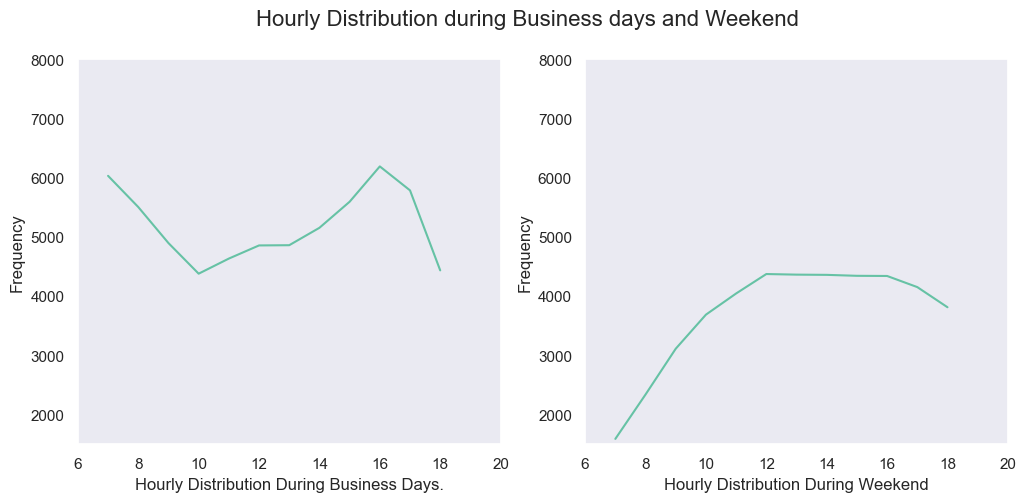

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

axes[0].plot(by_hour_business['traffic_volume'])
axes[0].set_xlabel('Hourly Distribution During Business Days.')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(6, 20)
axes[0].set_ylim(1500,8000)
axes[0].grid()

axes[1].plot(by_hour_weekend ['traffic_volume'])
axes[1].set_xlabel('Hourly Distribution During Weekend')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(6, 20)
axes[1].set_ylim(1500, 8000)
axes[1].grid()

fig.suptitle('Hourly Distribution during Business days and Weekend', fontsize=16)

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

###  Weather Indicators
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`,`clouds_all`, `weather_main`, `weather_description`.

In [84]:
# df['weather_description'].value_counts()

Lets find the correlation values between `traffic_volume` and the numerical weather columns. The correlation matrix heatmap visually illustrates the strongest correlated values.

In [85]:
daytime_data.corr(numeric_only=True)['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

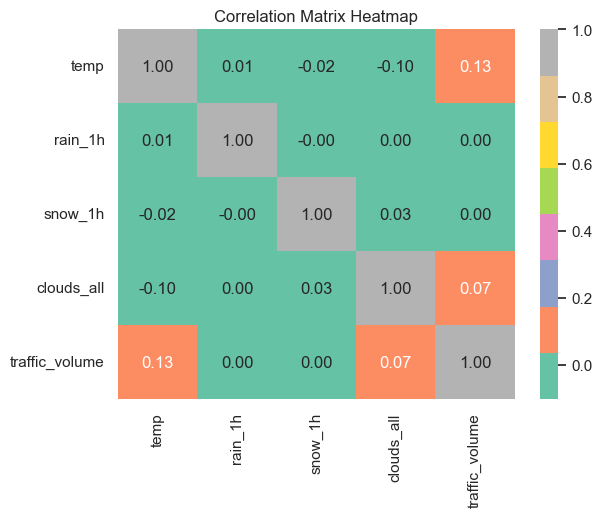

In [86]:
# Selecting numerical columns
numerical_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
correlation_matrix = df[numerical_columns].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The `temperature`(0.13) has the strongest corrleation with `traffic_volume`. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with traffic_value.

The temperature in the dataset presented in Kelvin`s units, so, to enhance our understanding of how weather conditions may influence traffic volume, let's convert the temperature in the dataset from Kelvin to Fahrenheit.


In [87]:
#Convert temperature in Kelvin to Farenheit 
daytime_data['temp_F'] = (daytime_data['temp'] - 273.15) * 9/5 +32


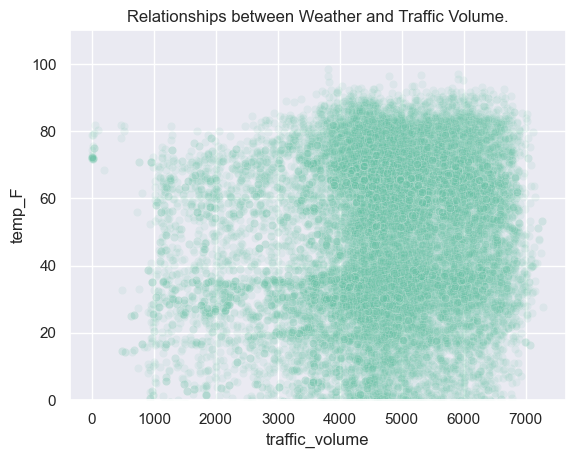

In [88]:
sns.scatterplot(data=daytime_data, x='traffic_volume', y='temp_F', alpha=0.1 )
plt.ylim(0,110)
plt.title('Relationships between Weather and Traffic Volume.')
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

In [89]:
by_weather_main = daytime_data.groupby('weather_main').mean(numeric_only=True)
by_weather_description = daytime_data.groupby('weather_description').mean(numeric_only=True)

In [90]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,month,year,dayofweek,temp_F
weather_main,,,,,,,,,,
Clear,283.812078,0.000000,0.000000,1.670265,4778.416260,12.404248,6.490599,2015.619429,3.138928,51.191740
Clouds,282.929274,0.000000,0.000000,62.667548,4865.415996,12.911974,6.393243,2015.321420,3.005631,49.602694
Drizzle,284.456433,0.170804,0.000000,84.704417,4837.212911,12.308041,7.105323,2015.882220,2.934315,52.351579
Fog,277.579641,0.163840,0.001409,65.477901,4372.491713,10.325967,6.646409,2015.814917,2.798343,39.973354
Haze,275.319353,0.040036,0.000000,64.000000,4609.893285,12.467626,5.832134,2015.557554,2.754197,35.904835


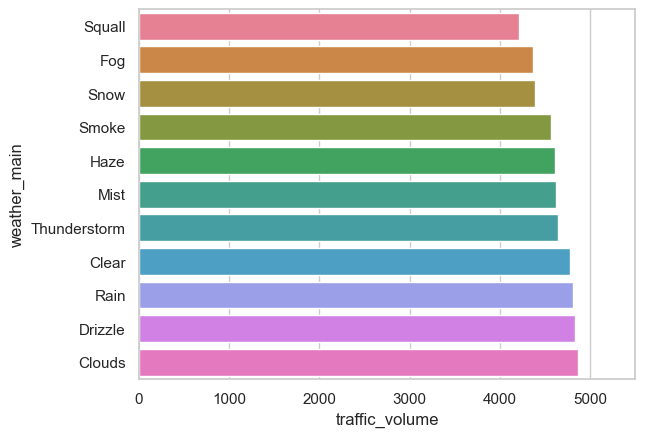

In [91]:
sns.set_style("whitegrid")
# Sorting values in ascending order. 
by_weather_main = by_weather_main.sort_values(['traffic_volume'])
sns.color_palette(palette='Accent')
sns.barplot(x='traffic_volume', y='weather_main', hue='weather_main', data=by_weather_main)

plt.xlim(0,5500)
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more granular weather classification.

In [92]:
# by_weather_description.head(2)

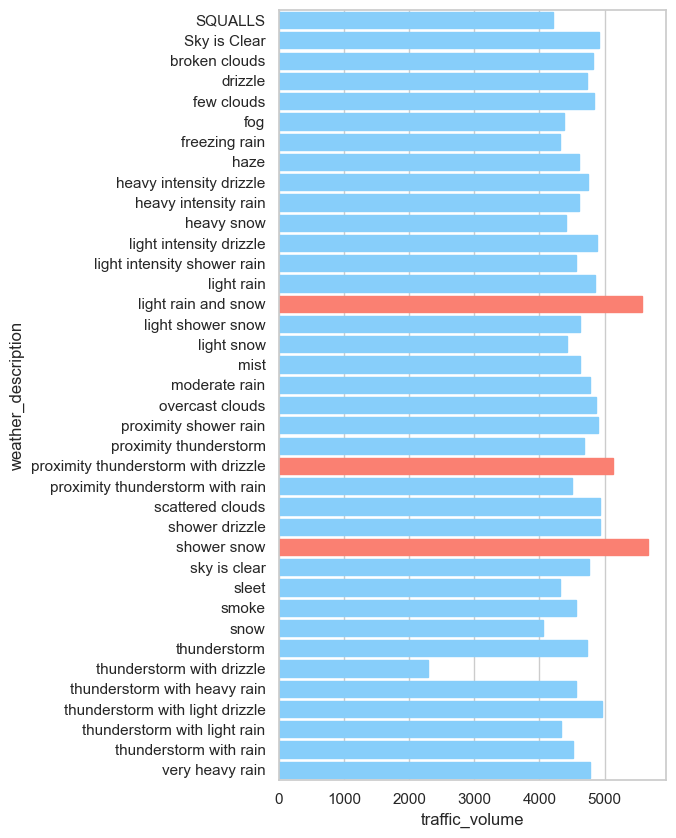

In [93]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,10))
sns.barplot(x='traffic_volume', y='weather_description', data=by_weather_description)

# Assign a specific color to bars in the chart that represent values exceeding 5000.
for bar in plt.gca().patches:
    # Set color conditionally based on the height of the bar
    if bar.get_width() > 5000:
        bar.set_color('salmon')  
    else:
        bar.set_color('lightskyblue')  

plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

### Holidays Indicator

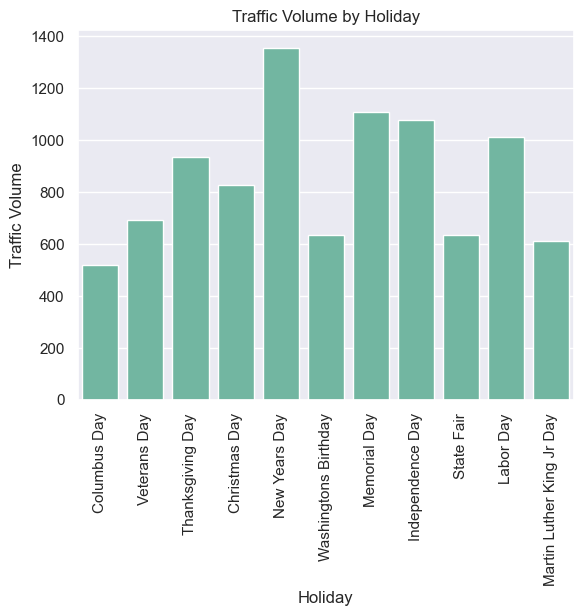

In [94]:
sns.set_theme(palette='Set2')
sns.barplot(data=df, x='holiday', y='traffic_volume',errorbar=None)

plt.title('Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=90) 

plt.show()
               




### Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

>  **Time indicators**

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.
> **Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle
> **Holidays indicators**
- The heaviest traffic is observed on The New Years Days 